## start


In [2]:
import numpy as np
import pandas as pd
# import scipy.interpolate

import subprocess
import os
from tqdm import tqdm

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
%matplotlib widget


In [3]:
c_light = 2.99792458e10
AU = 1.495978707e13


<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_126896/2456478416.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(1, 1, label=r"a$_{\rm max} =$"+f"{3} $\mu$m")


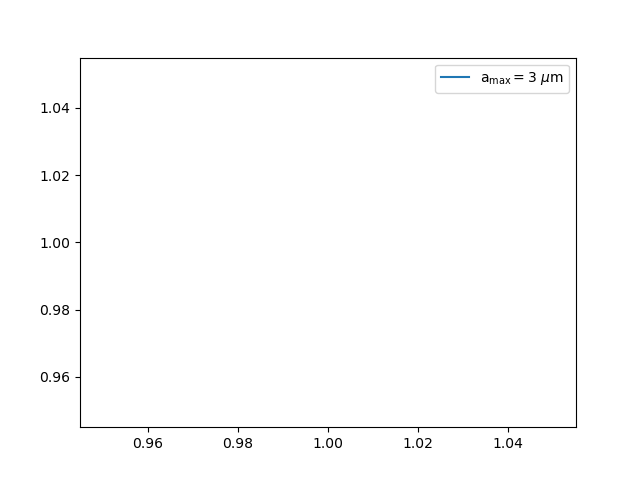

In [33]:
N = 1
f"{N:04d}.dat"
plt.close()
plt.plot(1, 1, label=r"a$_{\rm max} =$"+f"{3} $\mu$m")
plt.legend()
plt.show()

In [3]:
with open("Run33_fast/meta_names.txt") as f:
	meta_names = f.readlines()

meta_names	

list_energy = [None] * len(meta_names)

for i, name in enumerate(tqdm(meta_names)):
	in_file = f"Run33_fast/meta_output/{name[:-1]}/output_data/energy.dat"
	try:
		with open(in_file) as f:
			head = f.readline().split()[1:]

		list_energy[i] = pd.read_table(in_file, comment="#", sep="\s+", names=head)
	except:
		pass
	
head

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_126896/2242322953.py:14: SyntaxWarning: invalid escape sequence '\s'
  list_energy[i] = pd.read_table(in_file, comment="#", sep="\s+", names=head)
100%|██████████| 16/16 [00:00<00:00, 31971.83it/s]


NameError: name 'head' is not defined

100%|██████████| 16/16 [00:00<00:00, 716.68it/s]


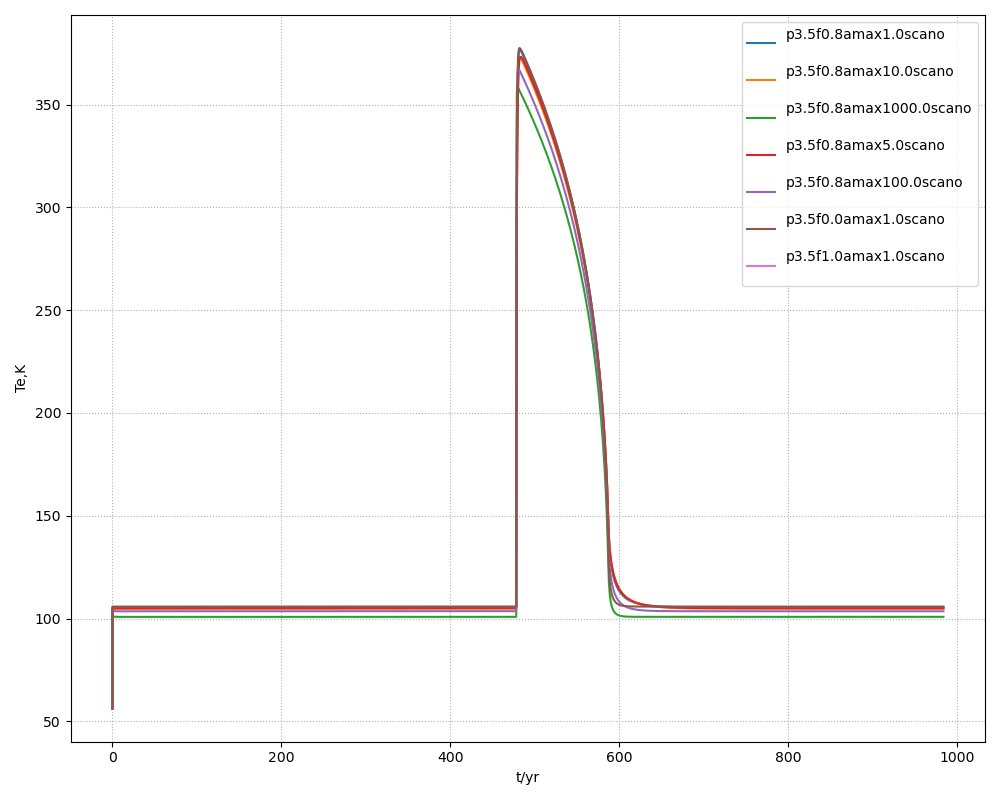

In [44]:


plt.close()
plt.figure(figsize=(10,8))

# ylab = "Lacc/LSun"
ylab = "Te,K"
for i, name in enumerate(tqdm(meta_names)):
	try:
		plt.plot(list_energy[i]["t/yr"], list_energy[i][ylab], label=f"{name}")
	except:
		pass

plt.legend()
plt.xlabel("t/yr")
plt.ylabel(ylab)


plt.grid(linestyle=":")
plt.tight_layout()
plt.show()


## kappaP


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_9845/2426522374.py:5: SyntaxWarning: invalid escape sequence '\s'
  df_dataPR0 = pd.read_csv(dataPR0, sep="\s+", skiprows=1)
/tmp/ipykernel_9845/2426522374.py:6: SyntaxWarning: invalid escape sequence '\s'
  df_dataPR08 = pd.read_csv(dataPR08, sep="\s+", skiprows=1)
/tmp/ipykernel_9845/2426522374.py:7: SyntaxWarning: invalid escape sequence '\s'
  df_dataPR1 = pd.read_csv(dataPR1, sep="\s+", skiprows=1)


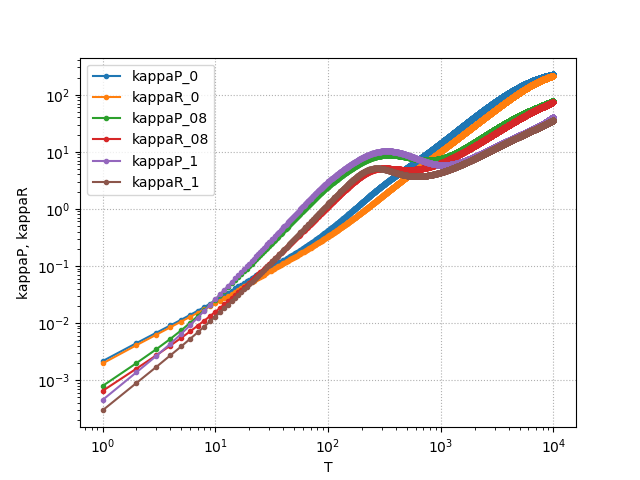

In [3]:

dataPR0 = "/home/sergey/diploma_/input_opacities/opacity_PR_p3.5f0.0amax1.0scano.txt"
dataPR08 = "/home/sergey/diploma_/input_opacities/opacity_PR_p3.5f0.8amax1.0scano.txt"
dataPR1 = "/home/sergey/diploma_/input_opacities/opacity_PR_p3.5f1.0amax1.0scano.txt"

df_dataPR0 = pd.read_csv(dataPR0, sep="\s+", skiprows=1)
df_dataPR08 = pd.read_csv(dataPR08, sep="\s+", skiprows=1)
df_dataPR1 = pd.read_csv(dataPR1, sep="\s+", skiprows=1)
# display(df_mult_data11)


# mult_dataPR_ = "/home/sergey/diploma_/hurakan/input_data/opacity2.dat"

# df_mult_dataPR_ = pd.read_csv(mult_dataPR_, sep="\s+",skiprows=6, names=["temperature[K]", "kappa_P[cm2/g]", "kappa_R[cm2/g]", "kappa_S[cm2/g]"])
# # df_mult_data


plt.close()
plt.plot(df_dataPR0["temperature[K]"], df_dataPR0["kappa_P[cm2/g]"], ".-", label="kappaP_0")
plt.plot(df_dataPR0["temperature[K]"], df_dataPR0["kappa_R[cm2/g]"], ".-", label="kappaR_0")

plt.plot(df_dataPR08["temperature[K]"], df_dataPR08["kappa_P[cm2/g]"], ".-", label="kappaP_08")
plt.plot(df_dataPR08["temperature[K]"], df_dataPR08["kappa_R[cm2/g]"], ".-", label="kappaR_08")

plt.plot(df_dataPR1["temperature[K]"], df_dataPR1["kappa_P[cm2/g]"], ".-", label="kappaP_1")
plt.plot(df_dataPR1["temperature[K]"], df_dataPR1["kappa_R[cm2/g]"], ".-", label="kappaR_1")

plt.xlabel("T")
plt.ylabel("kappaP, kappaR")
plt.loglog()
plt.legend()
# plt.title(head)
plt.grid(linestyle=':')
plt.show()

In [9]:
ss = "0049"
ss
int(ss)+1

50

## alpha


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_39316/4173544073.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table(f"../input_opacities/opacity_nu_{name}.txt", sep="\s+", skiprows=6, names=["freq[1/s]", "kappa(abs)[cm2/g]", "sigma(sca)[cm2/g]"])
mkdir: невозможно создать каталог «kappaNu_from_lambda»: Файл существует


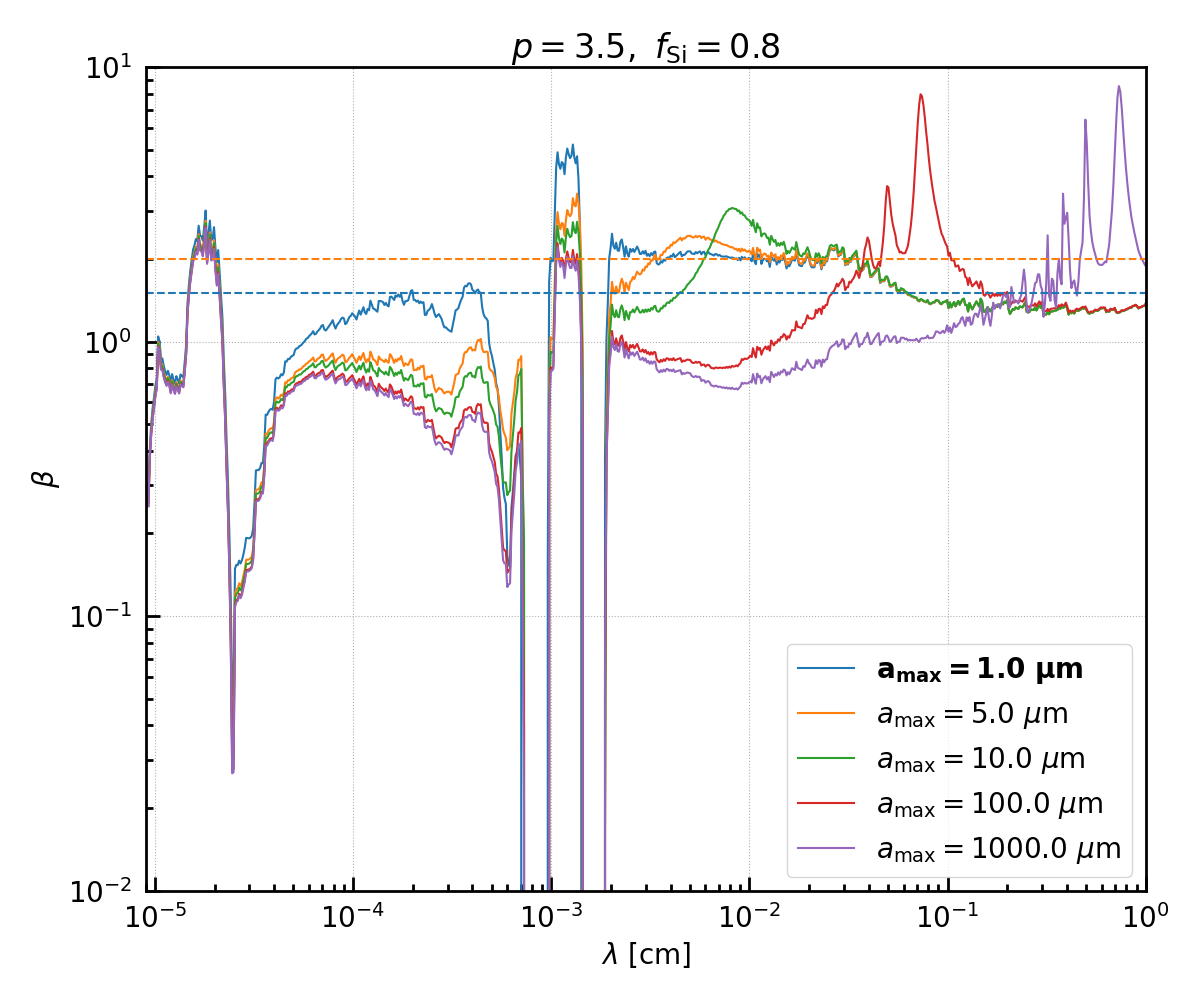

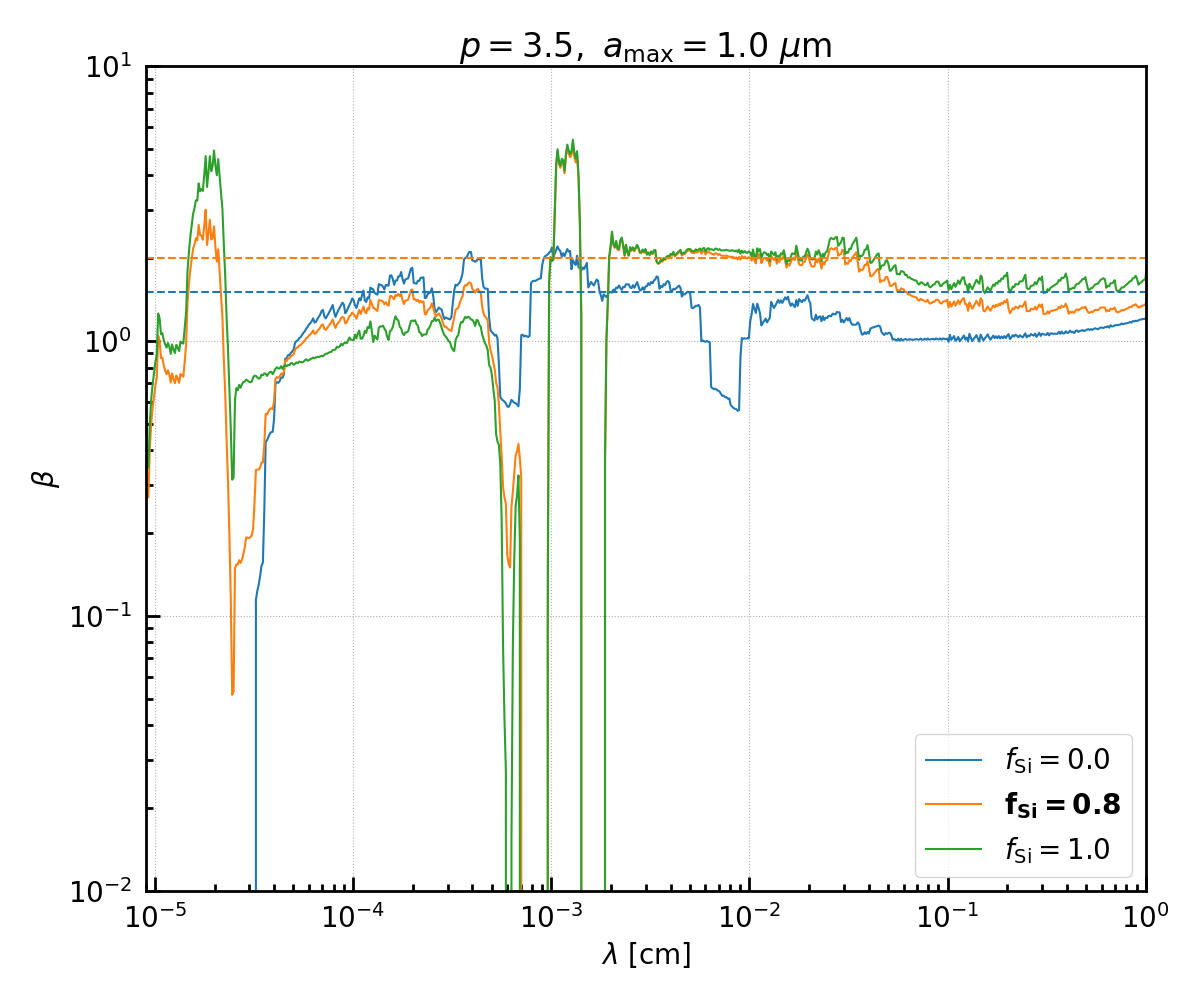

In [23]:
def get_data(name):
	# df = pd.read_table(f"../input_opacities/opacity_nu_{name}.txt", sep="\s+", comment="#")
	df = pd.read_table(f"../input_opacities/opacity_nu_{name}.txt", sep="\s+", skiprows=6, names=["freq[1/s]", "kappa(abs)[cm2/g]", "sigma(sca)[cm2/g]"])

	return c_light/np.array(df["freq[1/s]"]), np.array(df["freq[1/s]"]), np.array(df["kappa(abs)[cm2/g]"]), np.array(df["sigma(sca)[cm2/g]"])

# запускает из питона стороннюю программу 
def run_comm(command, path):
	subprocess.run(command, 
					encoding="utf-8", shell=True, cwd=f"{path}")

def set_ax(ax):
	ax.set_xlabel(r"$\lambda$ [cm]")
	ax.set_ylabel(r"$\beta$")
	# ax.set_ylabel(r"$\varkappa_\nu, \sigma_\nu$ [cm$^2$ g$^{-1}$]")
	ax.set_xlim(9e-6,1e0)
	ax.set_ylim(1e-2,1e1)
	ax.tick_params(direction='in', which='both', pad=10, width=2, length=5)
	ax.tick_params(which='major', length=10)
	for side in ax.spines.values():
		side.set_linewidth(2)
	ax.loglog()
	ax.grid(linestyle=':')

	texts = ax.legend(loc="lower right").get_texts() 

	return texts



with open("../opacities_for_HURAKAN/param_space.txt") as f:
	lines = f.readlines()

for l in lines:
	l_arr = l.split()[:-1]

	if l_arr[0] == "amax":
		amax0_micron = float(l_arr[1])
		amax_arr_micron = np.sort(np.array(list(map(float, l_arr[2:]))))
		amax0 = amax0_micron * 1e-4
		amax_arr = amax_arr_micron * 1e-4
	elif l_arr[0] == "frac1":
		frac10 = float(l_arr[1])
		frac1_arr =  np.sort(np.array(list(map(float, l_arr[2:]))))
	elif l_arr[0] == "p":
		p0 = float(l_arr[1])
		p_arr =  np.sort(np.array(list(map(float, l_arr[2:]))))



pwd_path = f"{os.getcwd()}"


pwd_path = f"{os.getcwd()}"
name = "kappaNu_from_lambda"
run_comm(f"mkdir {name}", pwd_path)
res = "./" + name


plt.rcParams.update({'font.size': 30})


for sca in ["yes"]:

	# pdf = PdfPages(f"{res}/{name}_amax_sca{sca}.pdf")

	plt.figure(figsize=(12,10))
	ax = plt.subplot(111)

	for i, amax_micron in enumerate(np.sort(np.append(amax_arr_micron, amax0_micron))):
		meta_name = f"p{p0}f{frac10}amax{amax_micron}sca{sca}"

		# if amax_micron == amax0_micron: k = i

		lambd, feq, kappa, sigma = get_data(meta_name)

		y = (np.log10(kappa[:-1]) - np.log10(kappa[1:])) /  (np.log10(feq[:-1]) - np.log10(feq[1:]))
		x = lambd[:-1]


		if amax_micron == amax0_micron:
			ax.plot(x, y, "-", color=f"C{i}", label=rf"$\mathbf{{a_{{max}} = {amax_micron}\ \mu m}}$")
		else:
			ax.plot(x, y, "-", color=f"C{i}", label=rf"$a_{{\rm max}} = {amax_micron}\ \mu \rm m$")
		# ax.plot(lambd, kappa, "-", color=f"C{i}",  label=r"a$_{\rm max} =$"+f"{amax_micron} $\mu$m")
		# ax.plot(lambd, sigma, "--", color=f"C{i}")

	ax.plot([9e-6,1e0], [1.5, 1.5], "--")
	ax.plot([9e-6,1e0], [2, 2], "--")

	texts = set_ax(ax)
	# texts[k].set_weight("bold")

	plt.title(rf"$p = {p0},\ f_{{\rm Si}} = {frac10}$")
	# add_text(ax)
	# add_legend2(ax)

	plt.tight_layout()
	plt.show()
	# pdf.savefig()
	plt.close()

	# pdf.close()

# ----------------------------------------------------------------------------------------------
	# pdf = PdfPages(f"{res}/{name}_fracSi_sca{sca}.pdf")

	plt.figure(figsize=(12,10))
	ax = plt.subplot(111)

	for i, frac1 in enumerate(np.sort(np.append(frac1_arr, frac10))):
		meta_name = f"p{p0}f{frac1}amax{amax0_micron}sca{sca}"

		# if frac1 == frac10: k = i

		lambd, feq, kappa, sigma = get_data(meta_name)


		y = (np.log10(kappa[:-1]) - np.log10(kappa[1:])) /  (np.log10(feq[:-1]) - np.log10(feq[1:]))
		x = lambd[:-1]


		if frac1 == frac10:
			ax.plot(x, y, "-", color=f"C{i}", label=rf"$\mathbf{{f_{{Si}} = {frac1}}}$")
		else:
			ax.plot(x, y, "-", color=f"C{i}", label=rf"$f_{{\rm Si}} = {frac1}$")
		# ax.plot(lambd, kappa, "-", color=f"C{i}", label=r"frac$_{\rm Si} =$"+f"{frac1}")
		# ax.plot(lambd, sigma, "--", color=f"C{i}")

	ax.plot([9e-6,1e0], [1.5, 1.5], "--")
	ax.plot([9e-6,1e0], [2, 2], "--")

	texts = set_ax(ax)
	# texts[k].set_weight("bold")

	plt.title(rf"$p = {p0},\ a_{{\rm max}} = {amax0_micron}\ \mu \rm m$")
	# add_text(ax)
	# add_legend2(ax)

	plt.tight_layout()
	plt.show()
	# pdf.savefig()
	plt.close()

	# pdf.close()

# ----------------------------------------------------------------------------------------------
	# pdf = PdfPages(f"{res}/{name}_p_sca{sca}.pdf")

	# plt.figure(figsize=(12,10))
	# ax = plt.subplot(111)

	# for i, p in enumerate(np.sort(np.append(p_arr, p0))):
	# 	meta_name = f"p{p}f{frac10}amax{amax0_micron}sca{sca}"

	# 	# if p == p0: k = i

	# 	lambd, kappa, sigma = get_data(meta_name)

	# 	if p == p0:
	# 		ax.plot(lambd, kappa, "-", color=f"C{i}", label=rf"$\mathbf{{p = {p}}}$")
	# 	else:
	# 		ax.plot(lambd, kappa, "-", color=f"C{i}", label=rf"$p = {p}$")
	# 	# ax.plot(lambd, kappa, "-", color=f"C{i}", label=f"p = {p}")
	# 	ax.plot(lambd, sigma, "--", color=f"C{i}")

	# texts = set_ax(ax)
	# # texts[k].set_weight("bold")

	# # plt.title(f"fracSi = {frac10}, amax = {amax0_micron} $\mu$m")
	# plt.title(rf"$f_{{\rm Si}} = {frac10},\ a_{{\rm max}} = {amax0_micron}\ \mu \rm m$")
	# # add_text(ax)
	# add_legend2(ax)

	# plt.tight_layout()
	# pdf.savefig()
	# plt.close()
	
	# pdf.close()



## 10um, sca=no/yes


In [18]:
dfno = pd.read_table("Run33_fast/scano.txt", sep="\s+")
dfyes = pd.read_table("Run33_fast/scayes.txt", sep="\s+")

df = pd.DataFrame()

df["i"] = dfno["i"]
df["j"] = dfno["j"]
df["dR"] = dfno["kappa_R"] - dfyes["kappa_R"]
df["dP"] = dfno["kappa_P"] - dfyes["kappa_P"]

# df.style.format({"i": "{:5d}", "j": "{:5d}", "dR": "{:.2f}", "dP": "{:.2f}"})
df.to_csv("Run33_fast/delta.txt", index=False, sep=" ")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_14564/3775747758.py:1: SyntaxWarning: invalid escape sequence '\s'
  dfno = pd.read_table("Run33_fast/scano.txt", sep="\s+")
/tmp/ipykernel_14564/3775747758.py:2: SyntaxWarning: invalid escape sequence '\s'
  dfyes = pd.read_table("Run33_fast/scayes.txt", sep="\s+")
